In [1]:
# Step 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Step 2: Create dataset
data = {
    'age': [18, 20, 22, 25, 28, 30, 35, 40, 45, 50],
    'salary': [1500, 1800, 2000, 2500, 3000, 3200, 4000, 4500, 5000, 5500],
    'bought': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data)

In [3]:
# Step 3: Feature matrix and target vector
X = df[['age', 'salary']]
y = df['bought']

In [4]:
# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:

# Step 5: SVC model training
model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [6]:

# Step 6: Predictions
y_pred = model.predict(X_test)

In [7]:

# Step 7: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [8]:
# Step 8: Visualize decision boundary
import numpy as np

# Create meshgrid
x_min, x_max = X['age'].min() - 1, X['age'].max() + 1
y_min, y_max = X['salary'].min() - 500, X['salary'].max() + 500
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                     np.arange(y_min, y_max, 100))

In [9]:
# Predict over the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

c:\Users\MukhammadAyyub\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


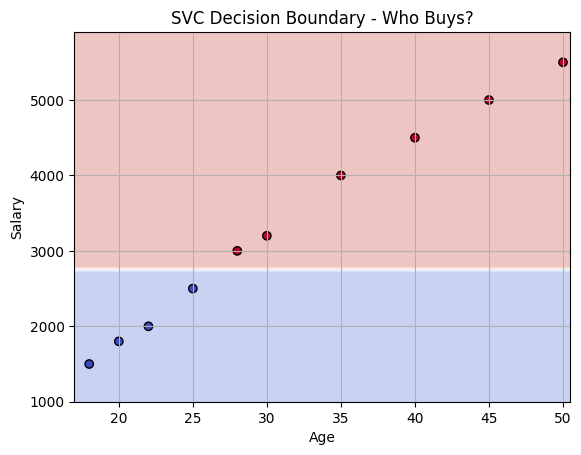

In [10]:

# Plot
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X['age'], X['salary'], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('SVC Decision Boundary - Who Buys?')
plt.grid(True)
plt.show()
